In [1]:
from env import host, username, password
from pydataset import data
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from env import host, username, password
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

In [2]:
def get_db(db_name, username = username, password = password, host = host):
    churn_url = f'mysql+pymysql://{username}:{password}@{host}/{db_name}'
    return pd.read_sql('''SELECT * FROM customers 
                          JOIN internet_service_types USING(internet_service_type_id)
                          JOIN contract_types USING(contract_type_id)
                          JOIN payment_types USING (payment_type_id);''',
                        churn_url)

In [3]:
churn_db = get_db('telco_churn')

In [4]:
churn_db.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [5]:
churn_db.describe()

,payment_type_id,contract_type_id,internet_service_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.690473,1.872923,0.162147,32.371149,64.761692
std,1.148907,0.833755,0.737796,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,1.000000,2.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [6]:
churn_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [7]:
churn_db['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [8]:
churn_db['total_charges'] = churn_db['total_charges'].str.replace(' ', '0.00').astype('float64')

In [9]:
churn_db.drop('customer_id', axis = 1, inplace = True)

In [10]:
val_col = ['gender', 'partner','dependents','phone_service','multiple_lines','online_security','online_backup', 'device_protection',
           'streaming_tv', 'streaming_movies','paperless_billing', 'churn', 'internet_service_type','contract_type', 'payment_type', 'tech_support']

In [11]:
for x in val_col:
    counts = churn_db[x].value_counts()
    print(f'Counts for {x}\n')
    print(f'{counts}\n') 

Counts for gender

Male      3555
Female    3488
Name: gender, dtype: int64

Counts for partner

No     3641
Yes    3402
Name: partner, dtype: int64

Counts for dependents

No     4933
Yes    2110
Name: dependents, dtype: int64

Counts for phone_service

Yes    6361
No      682
Name: phone_service, dtype: int64

Counts for multiple_lines

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

Counts for online_security

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

Counts for online_backup

No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64

Counts for device_protection

No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64

Counts for streaming_tv

No                     2810
Yes                    2707
No internet service 

In [12]:
churn_db.head()

,payment_type_id,contract_type_id,internet_service_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,Female,0,No,No,3,Yes,No,...,No internet service,No internet service,No internet service,No,19.85,57.20,No,None,Month-to-month,Mailed check
1,2,1,3,Female,0,Yes,Yes,4,Yes,No,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,Male,0,No,No,27,Yes,No,...,No internet service,No internet service,No internet service,Yes,19.40,529.80,No,None,Month-to-month,Electronic check
3,1,1,3,Male,0,No,No,1,Yes,No,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,Female,0,Yes,No,10,Yes,No,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


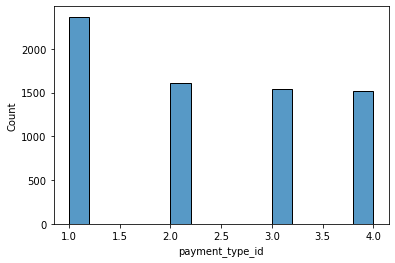

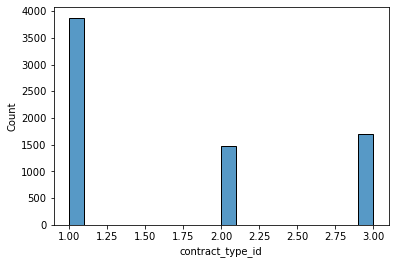

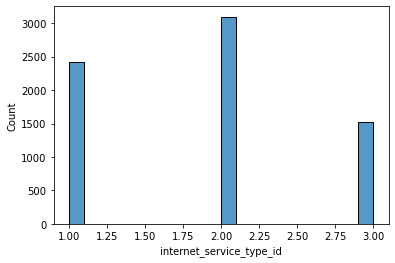

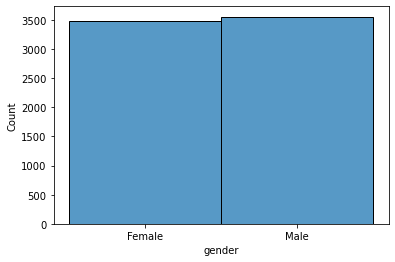

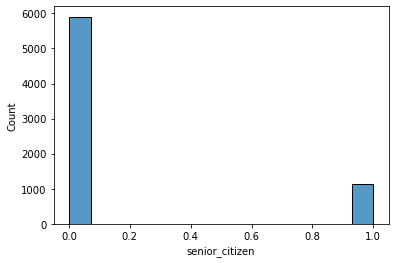

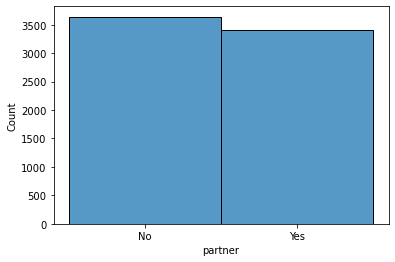

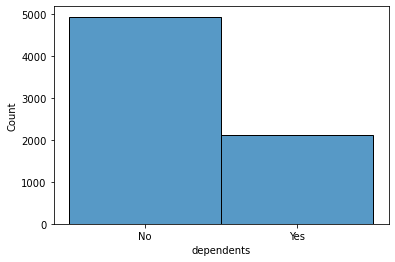

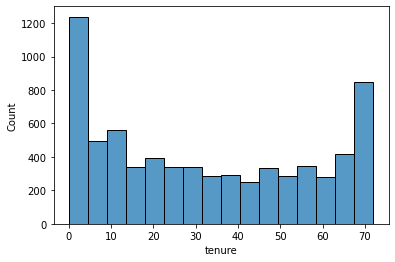

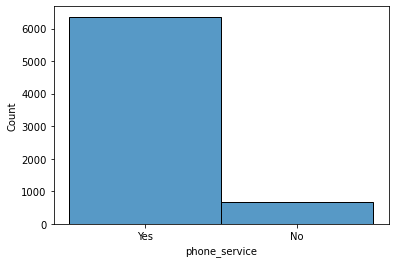

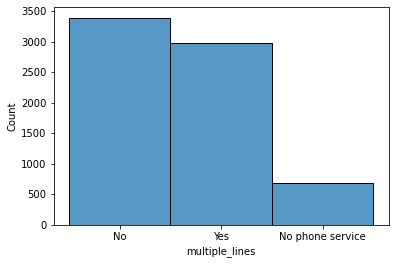

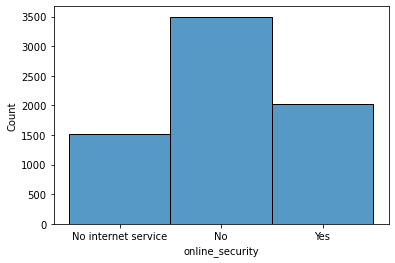

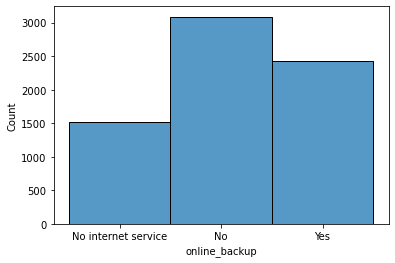

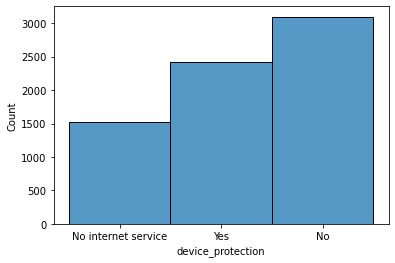

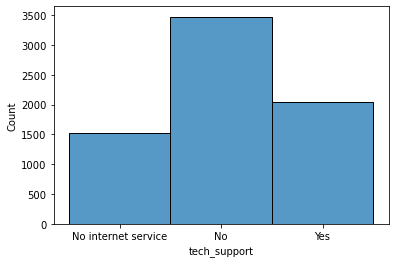

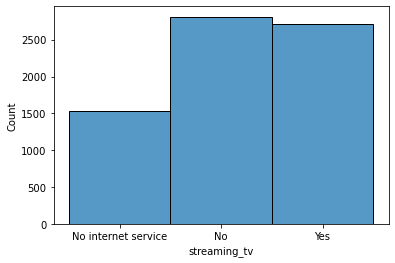

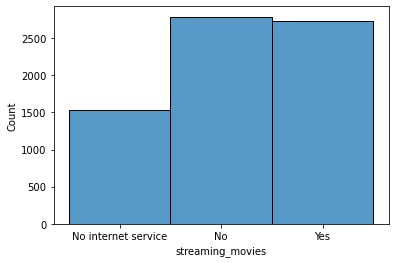

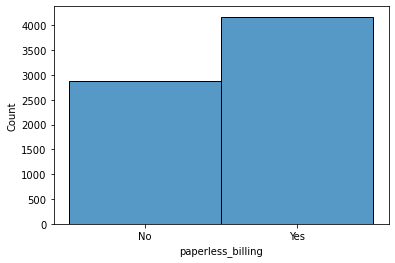

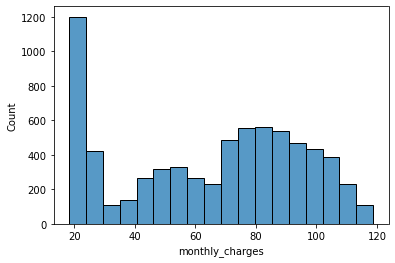

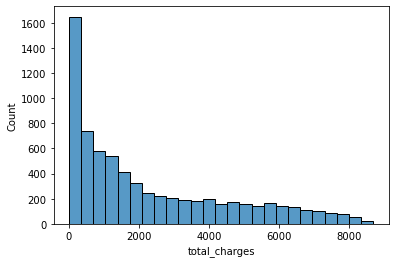

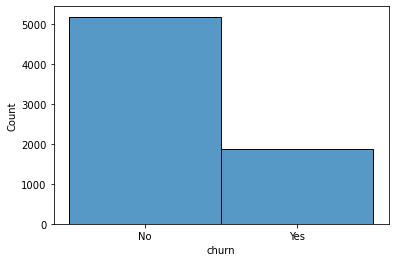

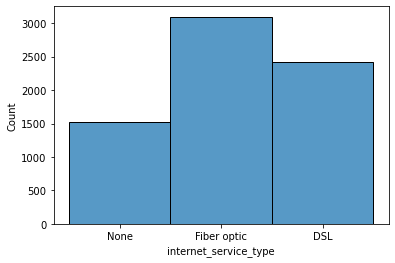

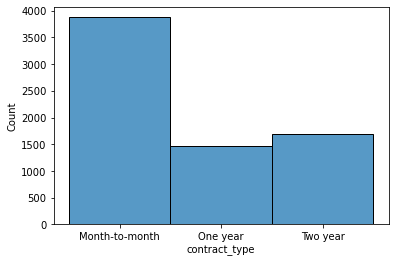

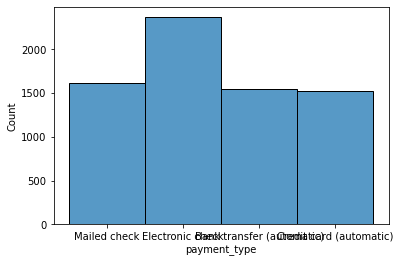

In [13]:
for x in churn_db:
    plt.show(sns.histplot(churn_db[x]))

In [14]:
churn_df = churn_db
label_encoder = LabelEncoder()
for x in churn_db.columns:
    churn_df[x] = label_encoder.fit_transform(churn_db[x])

In [15]:
churn_df

,payment_type_id,contract_type_id,internet_service_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,1,0,2,0,0,0,0,3,1,0,...,1,1,1,0,26,236,0,2,0,3
1,1,0,2,0,0,1,1,4,1,0,...,1,1,1,0,36,362,1,2,0,3
2,0,0,2,1,0,0,0,27,1,0,...,1,1,1,1,17,1664,0,2,0,2
3,0,0,2,1,0,0,0,1,1,0,...,1,1,1,1,26,20,1,2,0,2
4,2,0,2,0,0,1,0,10,1,0,...,1,1,1,1,28,808,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,3,2,0,1,1,1,0,72,1,2,...,0,2,2,1,977,5832,0,0,2,1
7039,2,2,0,0,0,1,1,72,1,2,...,0,2,2,1,842,5592,0,0,2,0
7040,1,2,0,0,0,0,0,12,0,1,...,2,0,2,0,373,1709,0,0,2,3
7041,1,2,0,1,0,1,1,67,1,0,...,2,0,2,0,675,5206,0,0,2,3


In [16]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [17]:
train, validate, test = train_validate_test_split(churn_df, 'churn')


In [18]:
train.head()

,payment_type_id,contract_type_id,internet_service_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
5707,2,2,2,1,1,1,0,72,1,2,...,1,1,1,1,92,3537,0,2,2,0
4471,2,1,1,0,0,1,1,56,1,0,...,0,2,2,0,1071,5387,0,1,1,0
4994,0,1,0,1,1,0,0,60,1,2,...,0,0,2,1,749,5088,0,0,1,2
3458,3,0,0,0,1,1,0,25,1,2,...,2,2,0,1,705,3477,0,0,0,1
3818,2,0,0,1,0,0,0,20,1,2,...,2,0,0,0,528,2750,0,0,0,0


In [19]:
y_col = 'churn'
X_cols = train.columns.drop(['churn','internet_service_type','contract_type','payment_type'])
X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [20]:
for x in train.columns:
    cross = pd.crosstab(index = train['churn'], columns = train[x])
    chi, p, dof, expected = stats.chi2_contingency(cross)
    print(f'{x} values = chi : {chi}, p = {p}')

payment_type_id values = chi : 388.4932768094715, p = 6.878634564501423e-84
contract_type_id values = chi : 625.2957407588264, p = 1.6548365916266811e-136
internet_service_type_id values = chi : 408.38413727951155, p = 2.0917575314027672e-89
gender values = chi : 0.02915631822886831, p = 0.8644186056543403
senior_citizen values = chi : 111.11158780012808, p = 5.593212171944653e-26
partner values = chi : 80.75747229348856, p = 2.551912417490838e-19
dependents values = chi : 113.54282491801567, p = 1.640986036223241e-26
tenure values = chi : 603.6507023411796, p = 5.616293728657241e-85
phone_service values = chi : 2.2617944337619877, p = 0.13260033423251052
multiple_lines values = chi : 13.504756020136831, p = 0.0011680985652636094
online_security values = chi : 447.01229589460195, p = 8.560778789658601e-98
online_backup values = chi : 312.7582417562411, p = 1.2173367070677348e-68
device_protection values = chi : 302.96367673238956, p = 1.6303223751223426e-66
tech_support values = chi : 

In [22]:
features = SelectKBest(chi2, k=5).fit(X_train, y_train)
mask = features.get_support() #list of booleans for selected features
new_feat = [] 
for bool, feature in zip(mask, X_train.columns):
     if bool:
        new_feat.append(feature)
print(f'The best features are:{new_feat}') # The list of your 5 best features

The best features are:['payment_type_id', 'contract_type_id', 'tenure', 'monthly_charges', 'total_charges']


In [23]:
feat_list = ['payment_type_id','contract_type_id','tenure','monthly_charges', 'total_charges']

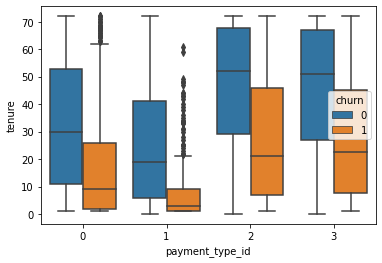

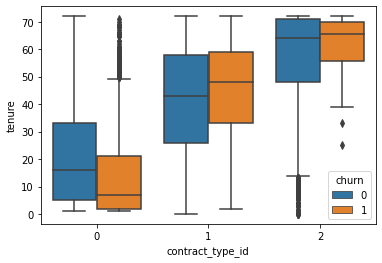

In [24]:
for x in churn_df[['payment_type_id','contract_type_id']]:
    plt.show(sns.boxplot(data = churn_df, x = churn_df[x], y = 'tenure', hue = 'churn'))

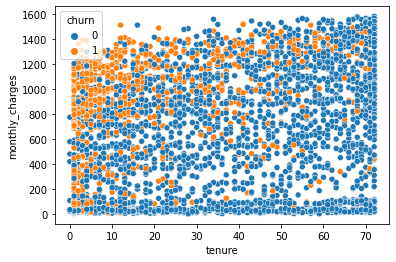

In [25]:
plt.show(sns.scatterplot(x = train['tenure'], y = train['monthly_charges'], hue = train['churn']))

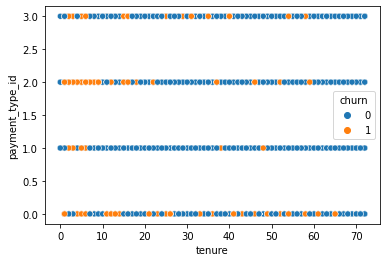

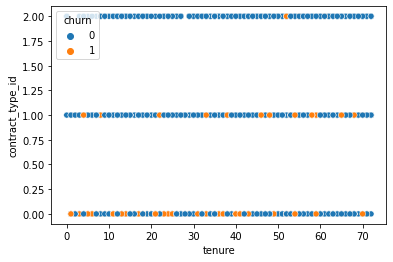

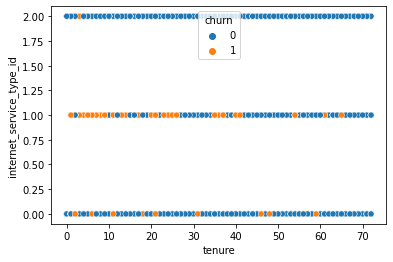

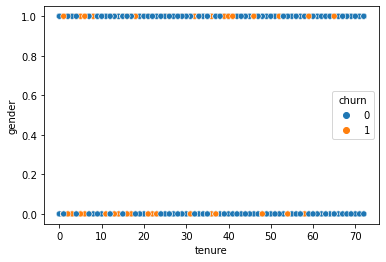

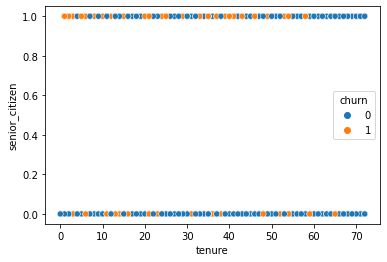

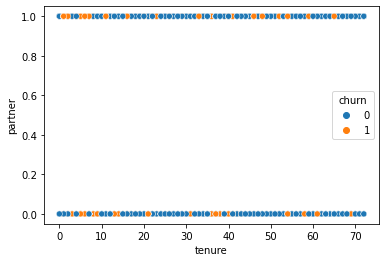

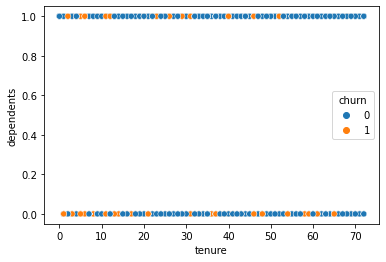

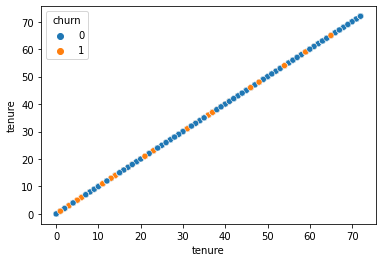

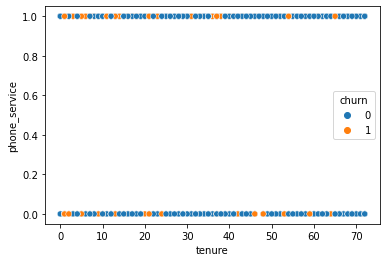

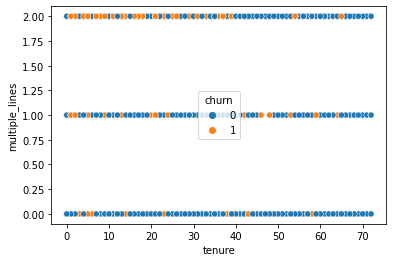

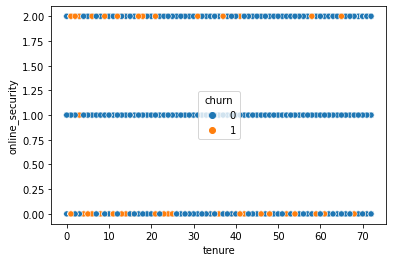

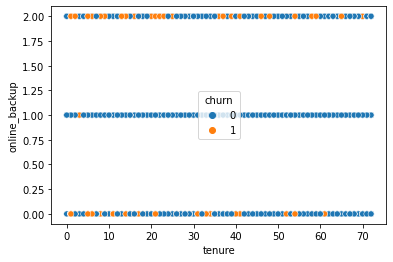

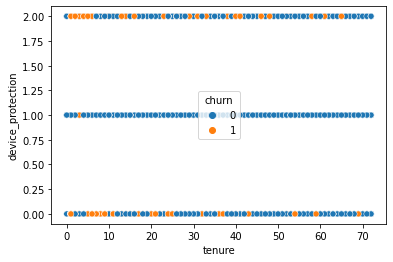

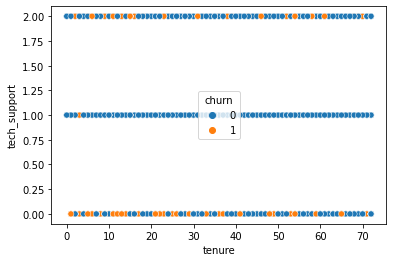

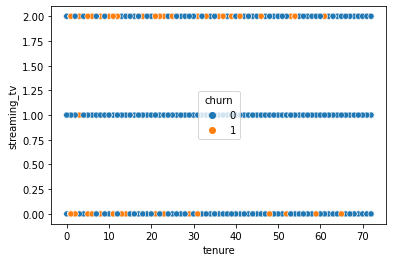

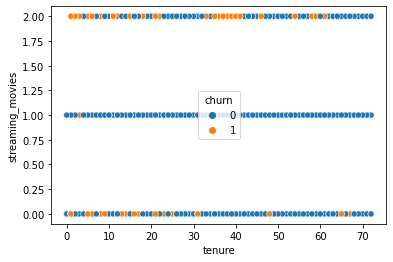

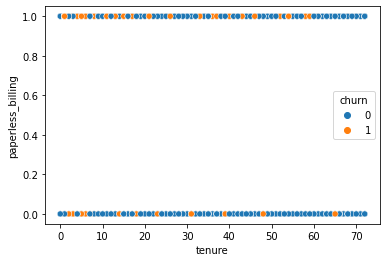

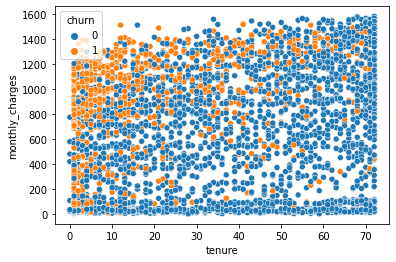

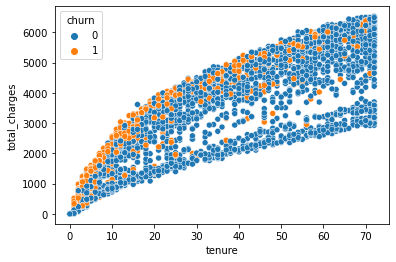

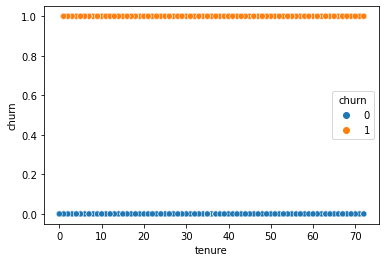

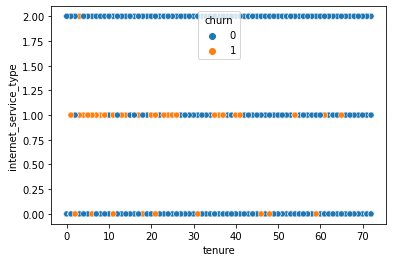

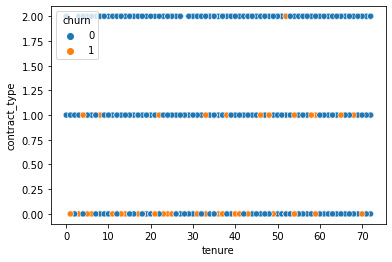

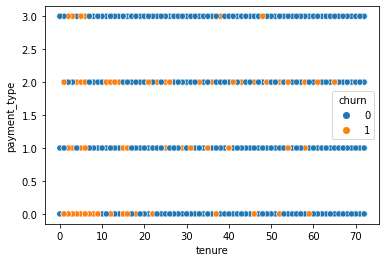

In [26]:
for x in train.columns:
    plt.show(sns.scatterplot(x = train['tenure'], y = train[x], hue = train['churn']))

In [27]:
churned = train[train['churn'] == 1]
not_churned = train[train['churn'] == 0]

In [28]:
stats.normaltest(not_churned['monthly_charges'])

NormaltestResult(statistic=7699.637815331852, pvalue=0.0)

In [29]:
stats.mannwhitneyu(churned['monthly_charges'], not_churned['monthly_charges'])

MannwhitneyuResult(statistic=1145311.0, pvalue=5.121700463478246e-32)

In [30]:
stats.mannwhitneyu(churned['total_charges'], not_churned['total_charges'])

MannwhitneyuResult(statistic=1068302.0, pvalue=8.252554630038709e-46)